# Train the KNN model with a PCA

KNN Accuracy: 57.98%
Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.75      0.72       151
           2       0.68      0.68      0.68       161
           3       0.50      0.71      0.59       140
           4       0.56      0.61      0.59       131
           5       0.53      0.45      0.49       150
           6       0.48      0.62      0.54       118
           7       0.59      0.52      0.55       151
           8       0.55      0.55      0.55       140
           9       0.57      0.56      0.56       153
          10       0.58      0.50      0.54       160
          11       0.56      0.52      0.54       151
          12       0.70      0.49      0.58       148

    accuracy                           0.58      1754
   macro avg       0.58      0.58      0.58      1754
weighted avg       0.59      0.58      0.58      1754



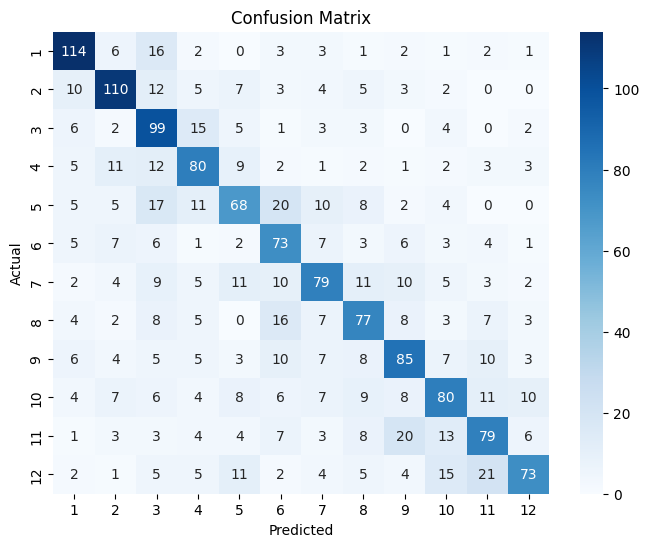

In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load PCA results
pca_data = pd.read_csv('PCA.csv')

# Separate features and labels
features = pca_data.drop(columns=['target'])  # Adjust column name if needed
labels = pca_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors'
knn.fit(X_train, y_train)

# Predict on test set
knn_predictions = knn.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, knn_predictions))

# Confusion Matrix
cm = confusion_matrix(y_test, knn_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels.unique(), yticklabels=labels.unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
